# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan pada proyek akhir ini adalah dataset gempa di Indonesia yang mencakup dari tahun 2008 - 2023. Tetapi saya hanya akan mengambil tahun 2022 agar dataset tidak terlalu kompleks.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [103]:
# Membaca dataset gempa
df = pd.read_csv("/content/dataset_gempa.csv")
df

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,1/1/2022,50:06.2,-8.13,122.38,10,2.9,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2022,48:17.8,-8.85,124.11,76,3.4,Timor Region,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2022,30:51.0,-3.59,140.21,12,3.8,Irian Jaya - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2022,15:37.7,-8.03,122.35,10,3.5,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2022,14:01.6,-8.04,122.39,10,3.0,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,12/31/2022,03:56.9,1.56,124.36,230,4.1,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN
10845,12/31/2022,39:11.5,3.71,97.66,10,3.4,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
10846,12/31/2022,00:55.6,0.35,122.01,167,2.7,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN
10847,12/31/2022,40:29.7,-8.98,116.80,13,2.6,Sumbawa Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [104]:
# Menampilkan informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      10849 non-null  object 
 1   ot       10849 non-null  object 
 2   lat      10849 non-null  float64
 3   lon      10849 non-null  float64
 4   depth    10849 non-null  int64  
 5   mag      10849 non-null  float64
 6   remark   10849 non-null  object 
 7   strike1  447 non-null    float64
 8   dip1     447 non-null    float64
 9   rake1    447 non-null    float64
 10  strike2  447 non-null    float64
 11  dip2     447 non-null    float64
 12  rake2    447 non-null    float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.1+ MB


Penjelasan terkait setiap kolom:



- tgl: tanggal kejadian
- ot: stempel waktu kejadian
- lat: garis lintang pusat kejadian (derajat)
- lon: bujur pusat gempa (derajat)
- depth: kedalaman kejadian (km)
- mag: magnitudo kejadian
- remark: Daerah Flinn-Engdahl dari peristiwa tersebut
- dip: sudut kemiringan bidang sesar terhadap bidang horizontal
- strike: arah garis perpotongan antara bidang sesar dengan bidang horizontal
- rake:  sudut yang menunjukkan arah pergerakan relatif pada bidang sesar

In [105]:
# Menampilkan statistik deskriptif dari dataset (kolom numerik)
df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,10849.000000,10849.000000,10849.000000,10849.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,-3.827482,118.247476,45.526684,3.422730,169.172707,60.887472,38.285906,208.381119,55.830649,45.644519
std,4.310098,10.930550,69.459574,0.832298,87.952599,19.829356,100.516302,116.437919,22.285074,89.963370
min,-11.000000,94.120000,2.000000,1.100000,4.900000,4.900000,-179.500000,0.380000,7.200000,-179.300000
25%,-7.970000,109.020000,10.000000,2.800000,106.950000,47.500000,-3.550000,76.030000,37.050000,-2.200000
50%,-3.710000,120.520000,14.000000,3.300000,141.700000,63.900000,67.000000,254.000000,58.700000,68.200000
75%,-0.020000,126.400000,49.000000,4.000000,208.150000,76.000000,101.600000,301.845000,76.050000,117.450000
max,5.980000,141.990000,750.000000,6.700000,359.000000,90.000000,180.000000,359.860000,90.000000,179.900000


Berikut beberapa informasi yang didapatkan dari hasil statistik deskriptif di atas:

- **lat**, titik latitude tempat terjadinya gempa berkisar terletak di -11 hingga 5.98, dengan rata - rata -3.82. Sebagian besar tempat kejadian terletak di titik -7.97 hingga -0.02.

- **lon**, titik longitude tempat terjadinya gempa berkisar terletak di 94.120000 hingga 141.99	, dengan rata - rata 118.247476. Sebagian besar tempat kejadian terletak di titik 109.02 hingga 126.4.

- **depth**, kedalaman gempa berkisar sebesar 2 km hingga 750 km, dengan rata-rata 45.52. Sebagian besar gempa terjadi dengan kedalaman 10 km hingga 49 km.

- **mag**, besar magnitudo gempa berkisar antara 1.1 hingga 6.7 SR, dengan rata-rata 3.4 SR. Sebagian besar gempa terjadi dengan magnitudo sebesar 2.8 hingga 4 SR.

- **Strike1**, arah horizontal bidang sesar berkisar antara 4.9°  hingga 359°, dengan rata-rata 169.17°. Sebagian besar gempa terjadi dengan arah horizontal bidang sesar 106.95° hingga 208.15°.

- **Dip1**, sudut kemiringan bidang sesar berkisar antara 4.9° hingga 90°, dengan rata-rata 60.88°. Sebagian besar gempa terjadi dengan sudut kemiringan bidang sesar 47.5° hingga 76°.

- **Rike1**, sudut arah pergerakan pada bidang sesar berkisar antara -179.5° hingga 180°, dengan rata-rata -38.28°. Sebagian besar gempa terjadi dengan sudut arah pergerakan pada bidang sesar -3.55° hingga 101.6°.

- **Strike2**, arah horizontal bidang sesar berkisar antara 0.38°  hingga 359.86°, dengan rata-rata 208.38°. Sebagian besar gempa terjadi dengan arah horizontal bidang sesar 76.03° hingga 301.845°.

- **Dip2**, sudut kemiringan bidang sesar berkisar antara 7.2° hingga 90°, dengan rata-rata 55.830649°. Sebagian besar gempa terjadi dengan sudut kemiringan bidang sesar 37.05° hingga 76.05°.

- **Rike2**, sudut arah pergerakan pada bidang sesar berkisar antara -179.3° hingga 179.9°, dengan rata-rata 45.644519°. Sebagian besar gempa terjadi dengan sudut arah pergerakan pada bidang sesar -2.2° hingga 117.45°.




In [106]:
# Mengecek apakah ada missing value
print(df.isnull().sum())

tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    10402
dip1       10402
rake1      10402
strike2    10402
dip2       10402
rake2      10402
dtype: int64


Terdapat missing value pada kolom strike1

In [107]:
# Mengecek apakah ada data duplikat
df.duplicated().sum()

0

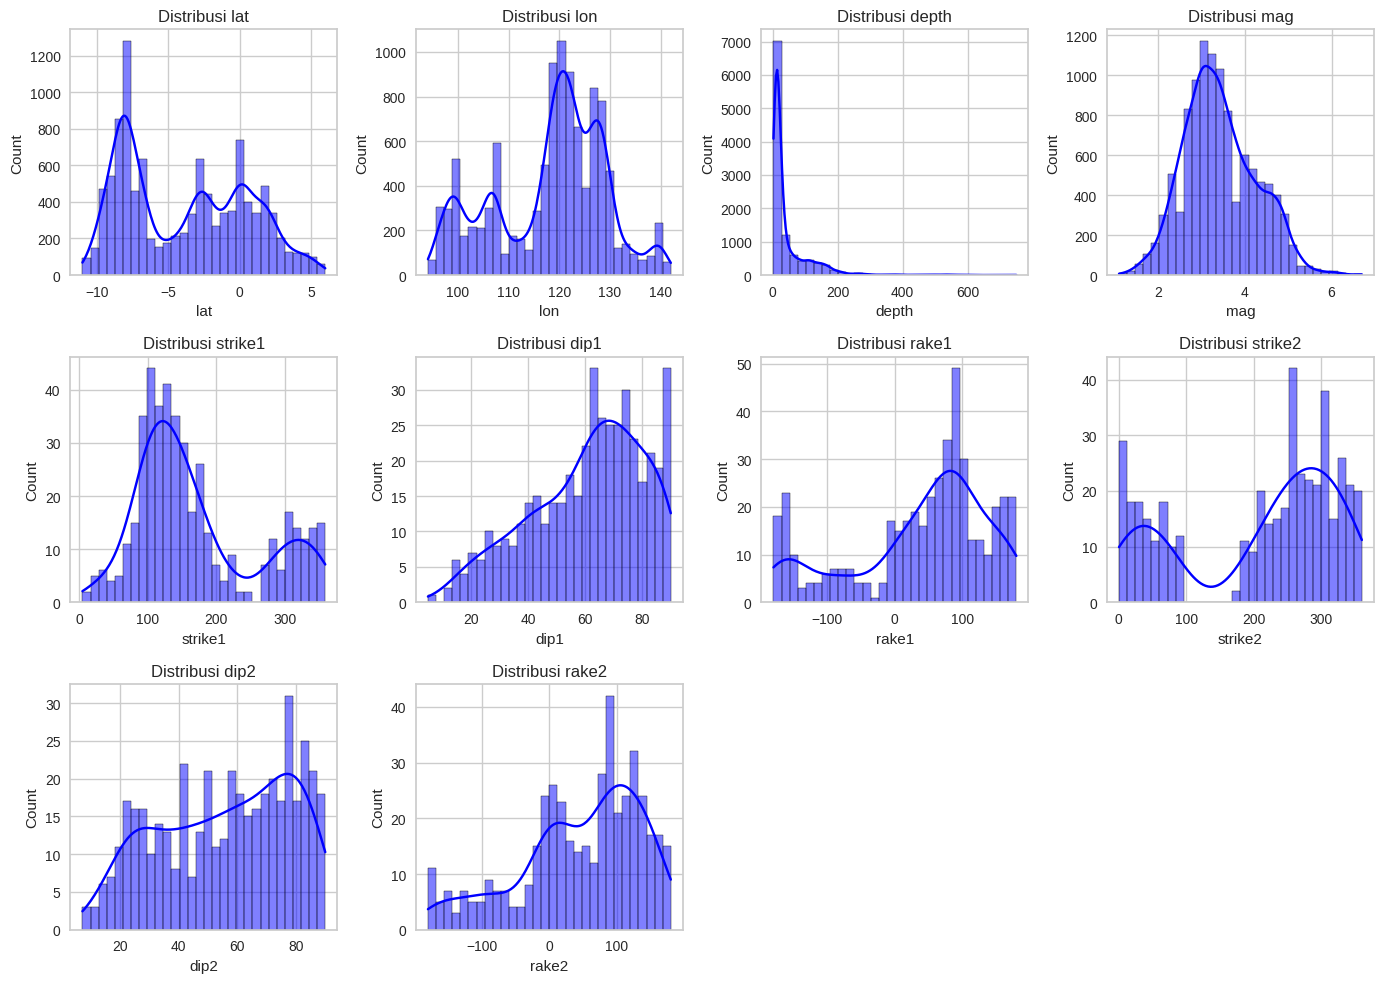

In [108]:
# Distribusi fitur numerik

num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Kesimpulan yang didapat:

- **lat**, distribusi menunjukkan terdapat 3 lonjakan yang terjadi di sekitar titik latitude -10 sampai 0 dan lonjakan paling tinggi di sekitar titik -10.

- **lon**, distribusi menunjukkan terdapat beberapa lonjakan yang terjadi, namun lonjakan paling tinggi berada di sekitar titik 120.

- **depth**, distribusi miring ke kanan. Sebagian besar gempa berada di kedalaman 0 km - 200 km dan sangat sedikit yang berada di kedalaman >200.

- **mag**, distribusi menunjukkan lonjakan terjadi pada saat magnitudo gempa berkekuatan 3 sampai 4 SR.

- **strike1**, distribusi menunjukkan lonjakan paling tinggi nilai strike terjadi di sekitar sudut 100.

- **dip1**, distribusi menunjukkan lonjakan tinggi terjadi pada nilai dip di sekitar sudut 60 hingga 80.

- **rake1**, distribusi menunjukkan lonjakan paling tinggi nilai rake terjadi di sekitar sudut 100.

- **strike2**, distribusi menunjukkan lonjakan paling tinggi nilai strike terjadi di sekitar sudut 200.

- **dip2**, distribusi menunjukkan lonjakan tinggi terjadi pada nilai dip di sekitar sudut 70.

- **rake2**, distribusi menunjukkan lonjakan paling tinggi nilai rake terjadi di sekitar sudut 90.



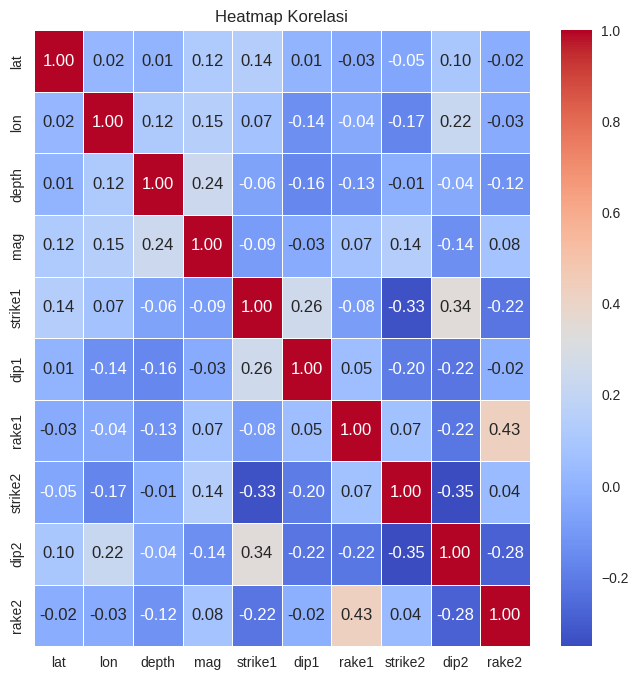

In [109]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(8, 8))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Dari heatmap di atas, rake1 - rake2, strike1 - dip 2, strike 1 - dip 1, dan mag - depth menghasilkan nilai korelasi paling tinggi.

<ipython-input-110-d9559f0dfe41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='remark', data=df, palette='coolwarm')


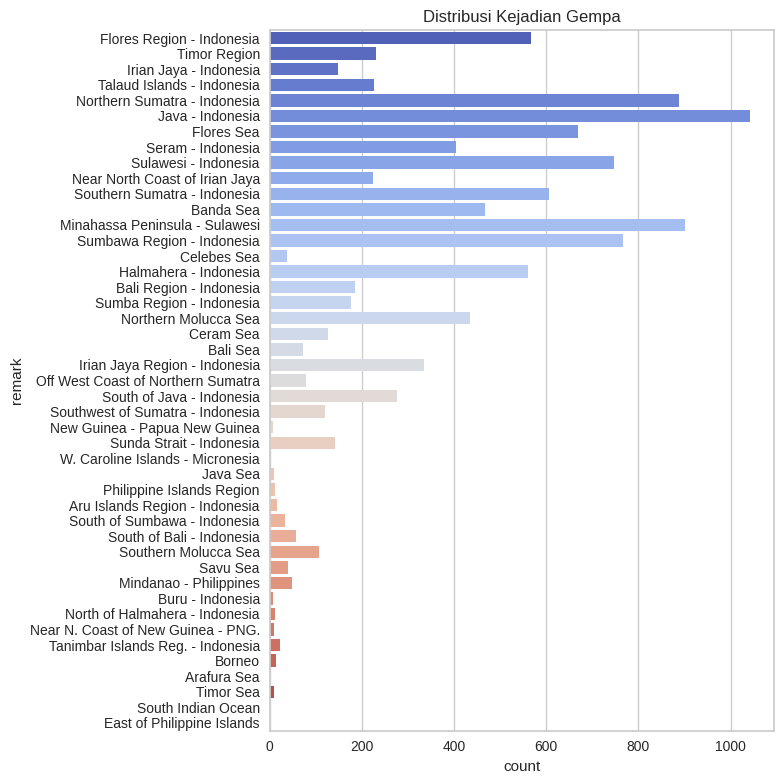

In [110]:
plt.figure(figsize=(8, 8))
sns.countplot(y='remark', data=df, palette='coolwarm')
plt.title('Distribusi Kejadian Gempa')
plt.tight_layout()
plt.show()

Pulau Jawa, Sumatera Utara, dan Semenanjung Minahasa  adalah tiga lokasi teratas dengan kejadian gempa paling banyak.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Sebelum melakukan tahap preprocessing, saya akan memilih terlebih dahulu kolom mana saja yang akan digunakan untuk keperluan analisis. Kolom yang dipilih yaitu **remark, lat, lon, depth, dan mag**. Maka yang akan dilakukan pembersihan hanya keenam kolom tersebut.

**1. Menangangi Missing Value**


In [111]:
# Mengisi missing values dengan median
df_new = df.copy()
kolom_numerik = df.select_dtypes(include=[np.number]).columns

# Mengisi missing values dengan median untuk setiap kolom numerik
for column in kolom_numerik:
    df_new[column] = df_new[column].fillna(df_new[column].median())

# Memeriksa apakah masih ada missing values
print("\nJumlah missing values setelah diisi median:")
print(df_new.isnull().sum())


Jumlah missing values setelah diisi median:
tgl        0
ot         0
lat        0
lon        0
depth      0
mag        0
remark     0
strike1    0
dip1       0
rake1      0
strike2    0
dip2       0
rake2      0
dtype: int64


**2. Mengatasi Outlier**

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


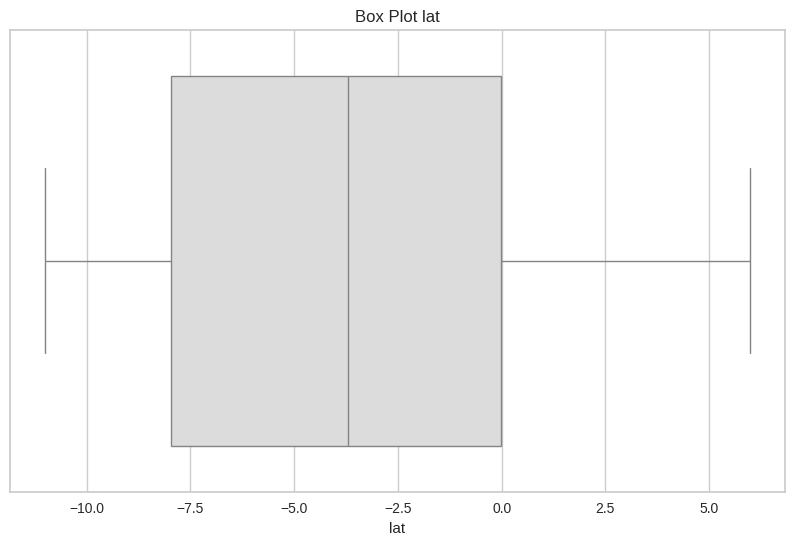

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


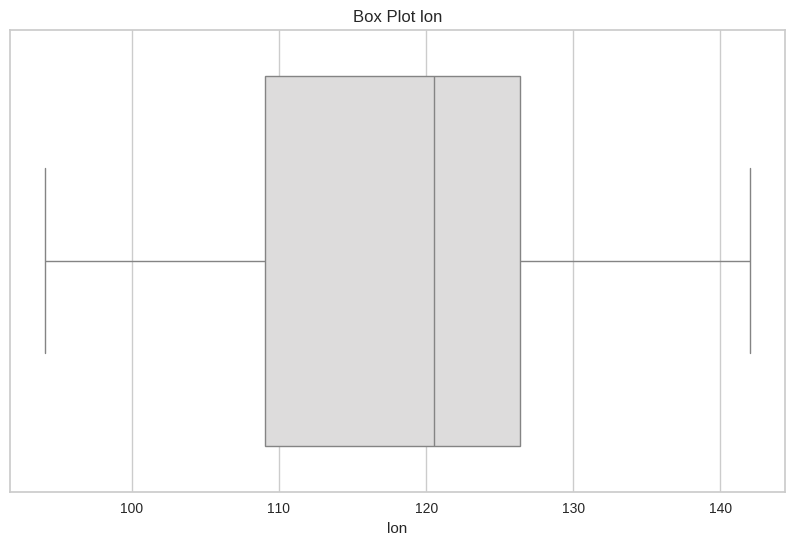

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


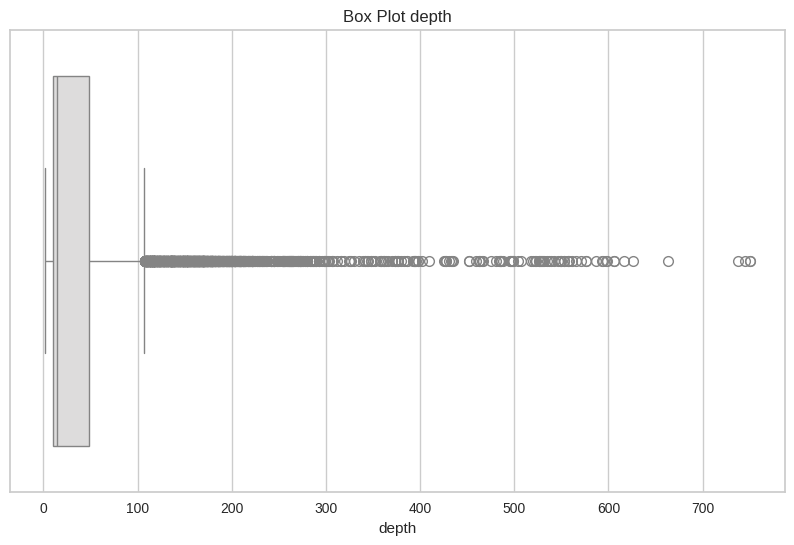

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


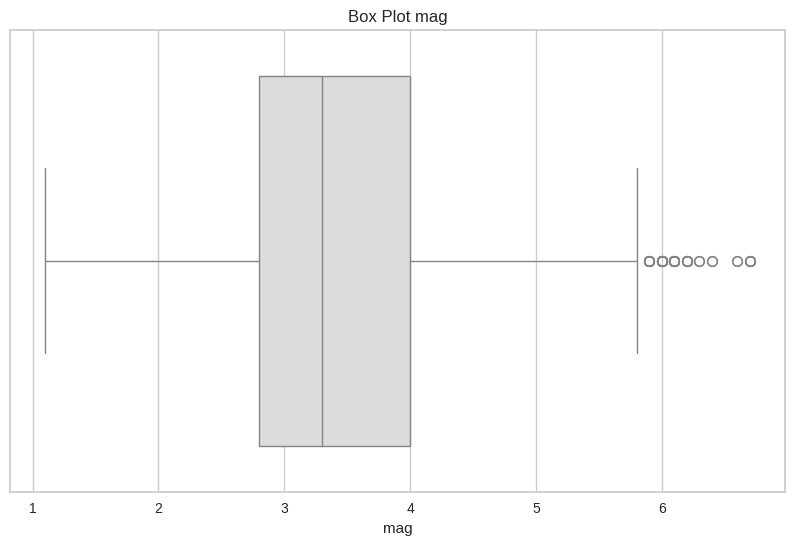

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


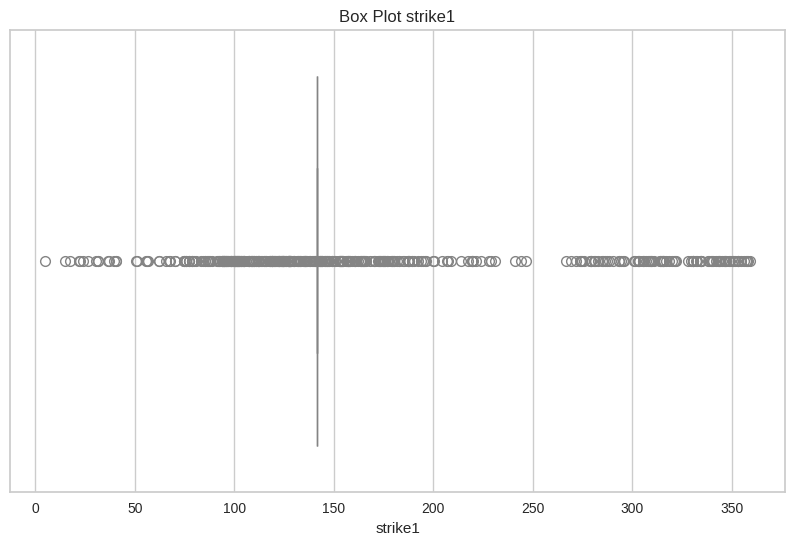

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


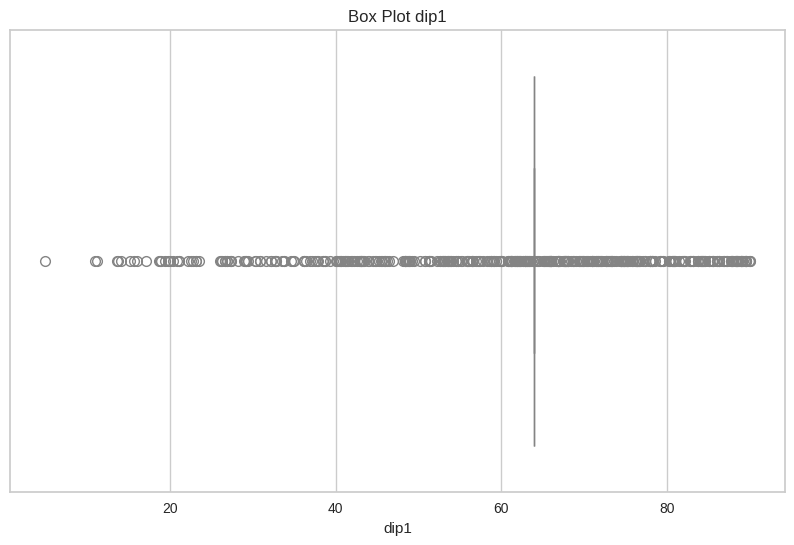

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


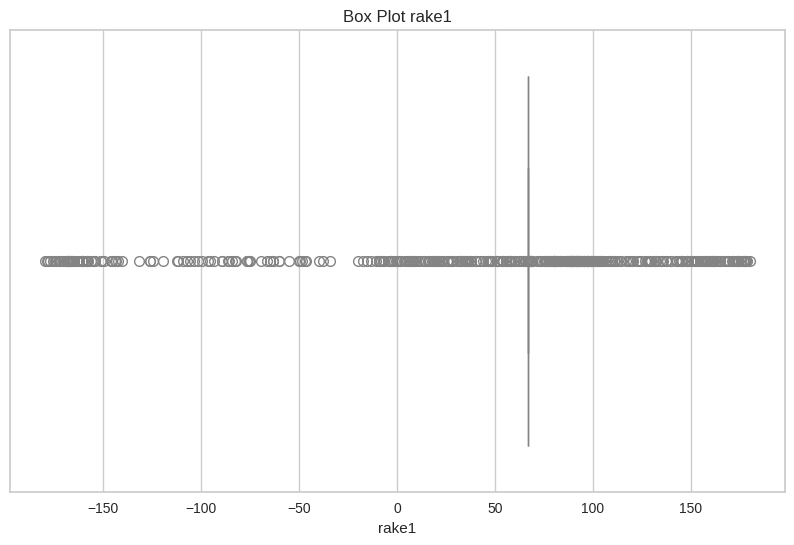

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


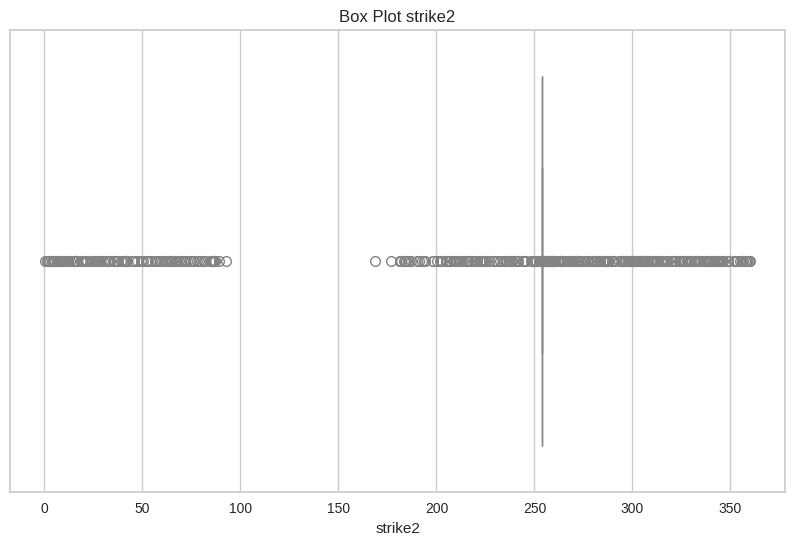

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


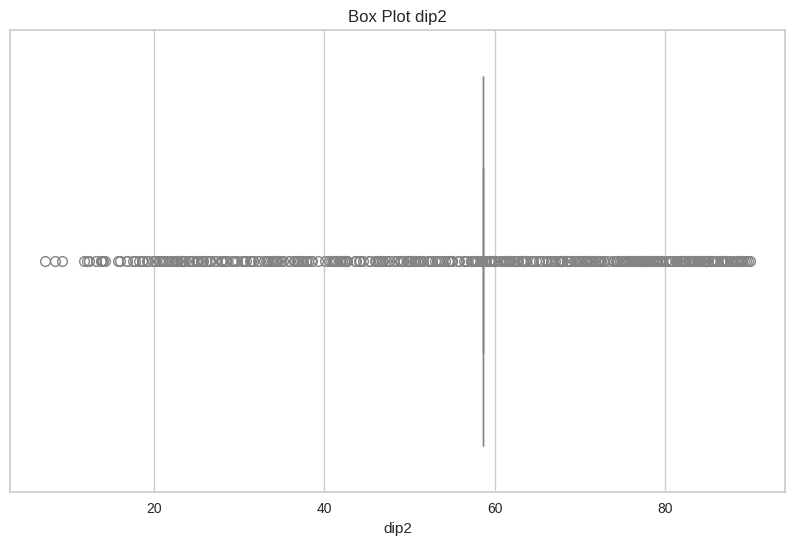

<ipython-input-112-f1fe87a70ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new[col], palette='coolwarm')


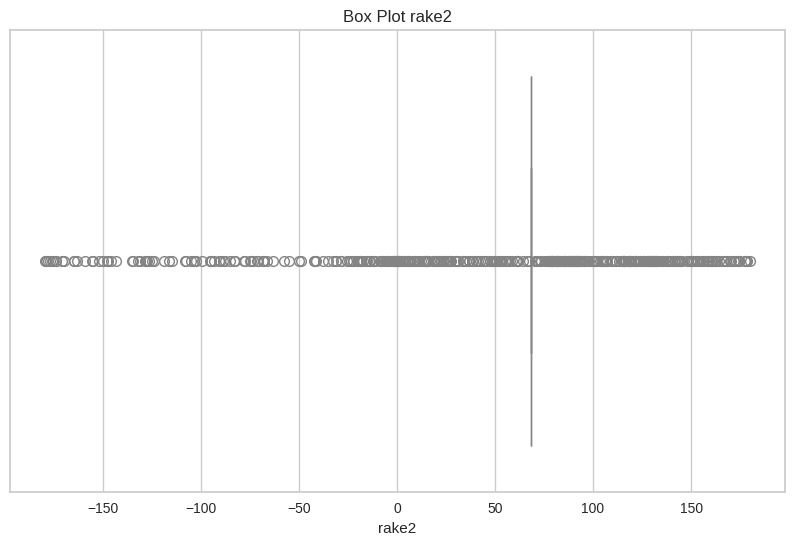

In [112]:
# Memilih kolom numerik
kolom_numerik = df_new.select_dtypes(include=[np.number])

# Membuat Box Plot
for col in kolom_numerik.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_new[col], palette='coolwarm')
    plt.title(f'Box Plot {col}')
    plt.show()

Dari hasil boxplot terdapat outlier pada beberapa kolom. Karena nilai dari kolom tersebut dapat memberikan informasi yang penting untuk keperluan analisis dan nilai outlier juga masih masuk akal, maka **oulier tidak dihapus**.

3. **Normalisasi Data**

  Kategori pada kolom remark jumlahnya banyak, maka akan lebih cocok menggunakan count encoding. Kemudian, karena algoritma yang akan digunakan adalah K-Means yang di mana algoritma tersebut bergantung pada jarak, maka akan dilakukan proses normalisasi dibandingkan standardisasi. Kemudian,

**4. Encoding Data Kategorikal**

In [113]:
# Mengambil kolom tipe object
kolom_kategorikal = df_new.select_dtypes(include=['object']).columns

# Melakukan count encoding
c_encoding_df_new = df_new[kolom_kategorikal].copy()
for col in kolom_kategorikal:
    count_map = df_new[col].value_counts().to_dict()
    c_encoding_df_new[col] = df_new[col].map(count_map)

# Reset indeks
c_encoding_df_new = c_encoding_df_new.reset_index(drop=True)

In [114]:
# Mengambil kolom numerik
kolom_numerik = df_new.select_dtypes(include=[np.number]).columns
df_numeric = df_new[kolom_numerik].reset_index(drop=True)

# Menggabungkan hasil count encoding dan kolom numerik
df_scaled = pd.concat([df_numeric, c_encoding_df_new], axis=1)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan min_max scaling pada kolom numerik
df_scaled[kolom_numerik] = scaler.fit_transform(df_scaled[kolom_numerik])

# 8. Menampilkan 5 baris pertama dari data yang sudah di-encode
print(df_scaled.head())

        lat       lon     depth       mag   strike1      dip1     rake1  \
0  0.169022  0.590349  0.010695  0.321429  0.386332  0.693302  0.685675   
1  0.126620  0.626488  0.098930  0.410714  0.386332  0.693302  0.685675   
2  0.436396  0.962816  0.013369  0.482143  0.386332  0.693302  0.685675   
3  0.174912  0.589722  0.010695  0.428571  0.386332  0.693302  0.685675   
4  0.174323  0.590558  0.010695  0.339286  0.386332  0.693302  0.685675   

    strike2      dip2     rake2  tgl  ot  remark  
0  0.705519  0.621981  0.689031   30   1     566  
1  0.705519  0.621981  0.689031   30   1     232  
2  0.705519  0.621981  0.689031   30   1     149  
3  0.705519  0.621981  0.689031   30   1     566  
4  0.705519  0.621981  0.689031   30   1     566  


In [115]:
# Inverse transform
df_original = scaler.inverse_transform(df_scaled[kolom_numerik])

# Data kembali ke bentuk awal
df_original = pd.DataFrame(df_original, columns=kolom_numerik)

# Menambahkan kolom remark dari df_baru ke df_original
df_original['remark'] = df['remark']

print("Data asli setelah inverse transform:")
print(df_original)

Data asli setelah inverse transform:
        lat     lon  depth  mag  strike1  dip1  rake1  strike2  dip2  rake2  \
0     -8.13  122.38   10.0  2.9    141.7  63.9   67.0    254.0  58.7   68.2   
1     -8.85  124.11   76.0  3.4    141.7  63.9   67.0    254.0  58.7   68.2   
2     -3.59  140.21   12.0  3.8    141.7  63.9   67.0    254.0  58.7   68.2   
3     -8.03  122.35   10.0  3.5    141.7  63.9   67.0    254.0  58.7   68.2   
4     -8.04  122.39   10.0  3.0    141.7  63.9   67.0    254.0  58.7   68.2   
...     ...     ...    ...  ...      ...   ...    ...      ...   ...    ...   
10844  1.56  124.36  230.0  4.1    141.7  63.9   67.0    254.0  58.7   68.2   
10845  3.71   97.66   10.0  3.4    141.7  63.9   67.0    254.0  58.7   68.2   
10846  0.35  122.01  167.0  2.7    141.7  63.9   67.0    254.0  58.7   68.2   
10847 -8.98  116.80   13.0  2.6    141.7  63.9   67.0    254.0  58.7   68.2   
10848  5.17   94.91   22.0  3.5    141.7  63.9   67.0    254.0  58.7   68.2   

              

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Model clustering akan menggunakan beberapa kolom saja, yaitu lat, lon, depth, mag, dan remark.

In [116]:
selected_columns = ['lat', 'lon', 'depth', 'mag', 'remark']
df_selected= df_scaled[selected_columns]

In [117]:
selected_columns2 = ['lat', 'lon', 'depth', 'mag', 'remark']
df_selected_inverse= df_original[selected_columns2]

In [118]:
# Menginisialisasi k-means dengan nilai n 3
kmeans = KMeans(n_clusters=3, random_state=42)

# Melatih model k-means
kmeans.fit(df_selected)

labels = kmeans.labels_

# Menambahkan label 'cluster' ke dalam df_original
df_selected_inverse['cluster'] = labels

<ipython-input-118-5c7a3bd17170>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_inverse['cluster'] = labels


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [119]:
# Menghitung nilai siluet dari model di atas
silhouette_avg = silhouette_score(df_selected, labels)
silhouette_avg

0.6139530720970946

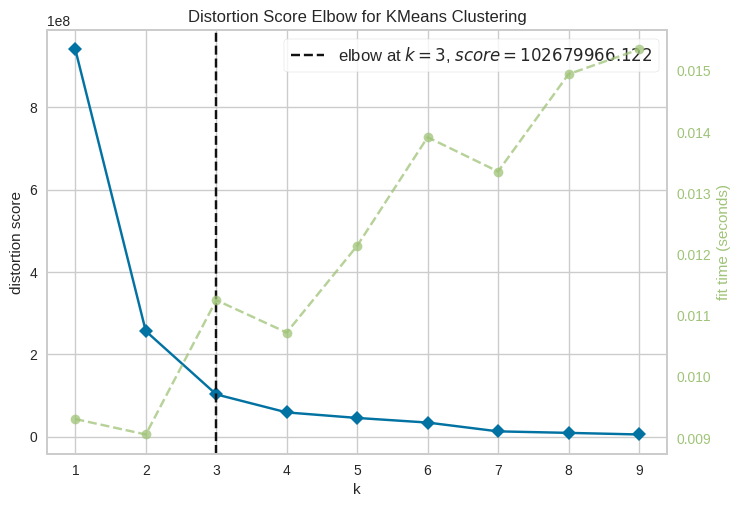

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans2 = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans2, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_selected)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Didapatkan jumlah cluster optimal adalah 3 cluster

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [121]:
selector = VarianceThreshold(threshold=0.01)
X_var_selected = selector.fit_transform(df_scaled)
selected_features = df_scaled.columns[selector.get_support()].tolist()

print("\nFitur yang terpilih setelah variance threshold:")
print(selected_features)


Fitur yang terpilih setelah variance threshold:
['lat', 'lon', 'mag', 'tgl', 'ot', 'remark']


In [122]:
selected_columns3 = ['lat', 'lon', 'mag', 'tgl', 'ot', 'remark']
df_selected_new= df_scaled[selected_columns3]

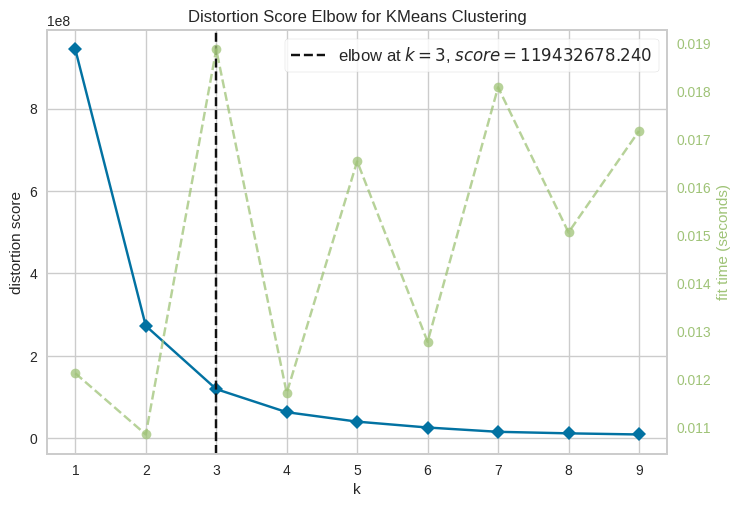

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [123]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans3 = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans3, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_selected_new)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [124]:
silhouette_avg = silhouette_score(df_selected_new, labels)
silhouette_avg

0.5945953911404152

Hasil silhouette score tanpa diterapkan feature selection sebesar 0.61, sedangkan setelah diterapkan feature selection sebesar 0.59. Oleh karena itu, hasil model clustering yang digunakan adalah yang tanpa diterapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

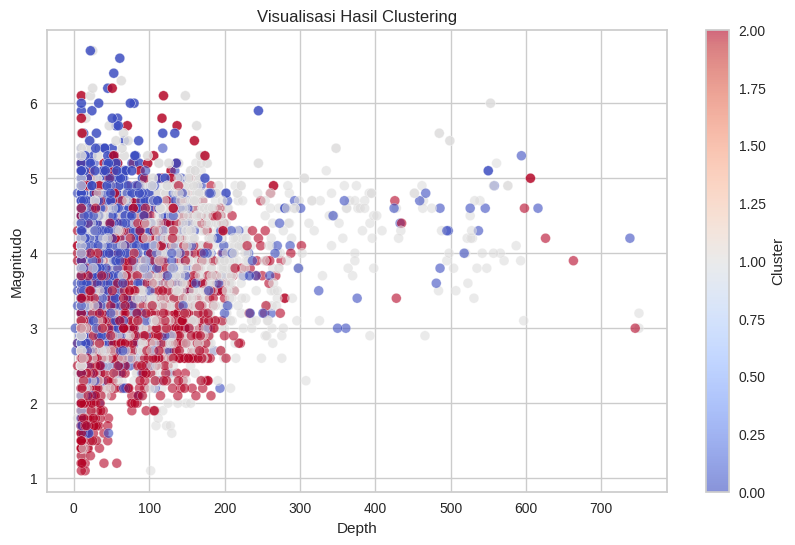

In [125]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_selected_inverse['depth'], df_selected_inverse['mag'], c=df_selected_inverse['cluster'], cmap='coolwarm', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('Depth')
plt.ylabel('Magnitudo')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [126]:
# Mengelompokkan data berdasarkan cluster
clustered_data = df_selected_inverse.groupby('cluster')

# Dapatkan statistik deskriptif untuk kolom numerik di setiap cluster
for cluster, data in clustered_data:
    print(f"Cluster {cluster}:")
    print(data.describe())

Cluster 0:
               lat          lon        depth          mag  cluster
count  3634.000000  3634.000000  3634.000000  3634.000000   3634.0
mean     -3.652221   123.818927    33.615300     3.667061      0.0
std       4.514269    10.445060    53.335768     0.799946      0.0
min     -11.000000    94.410000     2.000000     1.400000      0.0
25%      -8.210000   117.320000    10.000000     3.100000      0.0
50%      -3.060000   126.290000    13.000000     3.600000      0.0
75%      -0.140000   129.497500    34.000000     4.200000      0.0
max       5.980000   141.990000   738.000000     6.700000      0.0
Cluster 1:
               lat          lon        depth          mag  cluster
count  4383.000000  4383.000000  4383.000000  4383.000000   4383.0
mean     -5.139478   119.318515    55.371663     3.377116      1.0
std       3.589410     8.105778    83.418787     0.810840      0.0
min     -10.000000    98.020000     2.000000     1.100000      1.0
25%      -8.070000   118.040000    10.00

1. **Cluster 1 (Gempa dangkal, magnitudo besar)**: Menghasilkan **rata-rata kedalaman gempa 33.61 km** (Kedalaman paling pendek atau dangkal di antara semua cluster). Kemudian menghasilkan gempa dengan **rata-rata magnitudo sebesar 3.66 SR** (Magnitudo paling tinggi di antara semua cluster). Pada Cluster ini, lokasi gempa terjadi di sekitar wilayah **Sulawesi Tenggara**.


2. **Cluster 2 (Gempa dalam, magnitudo sedang)**: Menghasilkan **rata-rata kedalaman gempa 55.37 km** (Kedalaman paling dalam di antara semua cluster). Kemudian menghasilkan gempa dengan **rata-rata magnitudo sebesar 3.37 SR**. Pada Cluster ini, lokasi gempa terjadi di sekitar wilayah **Sulawesi Selatan** dan menghasilkan **cluster dengan jumlah paling banyak**, yaitu 4.383.


3. **Cluster 3 (Gempa menengah, magnitudo rendah)**: Menghasilkan **rata-rata kedalaman gempa 45.57 km**. Kemudian menghasilkan gempa dengan **rata-rata magnitudo sebesar 3.17 SR**(Magnitudo paling rendah di antara cluster yang lain). Pada Cluster ini, lokasi gempa terjadi di sekitar wilayah **Kalimantan Barat** dan menghasilkan **cluster dengan jumlah paling sedikit**, yaitu 2.832.

Dari hasil interpretasi di atas, gempa rata-rata terjadi di wilayah Kalimantan dan Sulawesi. Pihak berwajib yang berhubungan dengan kebencanaan bisa memberikan edukasi kepada masyarakat di wilayah tersebut, seperti apa yang harus yang dilakukan ketika gempa terjadi dan latihan evakuasi. Sistem peringatan bencana gempa juga perlu disiapkan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [127]:
# Menambahkan kolom cluster dari df_original ke df_baru
df_selected['cluster'] = df_selected_inverse['cluster']
df_selected

<ipython-input-127-613452f450ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = df_selected_inverse['cluster']


,lat,lon,depth,mag,remark,cluster
0,0.169022,0.590349,0.010695,0.321429,566,1
1,0.126620,0.626488,0.098930,0.410714,232,0
2,0.436396,0.962816,0.013369,0.482143,149,0
3,0.174912,0.589722,0.010695,0.428571,566,1
4,0.174323,0.590558,0.010695,0.339286,566,1
...,...,...,...,...,...,...
10844,0.739694,0.631711,0.304813,0.535714,901,2
10845,0.866313,0.073950,0.010695,0.410714,889,2
10846,0.668433,0.582620,0.220588,0.285714,901,2
10847,0.118963,0.473783,0.014706,0.267857,766,1


In [128]:
df_selected.to_csv('data_klasifikasi.csv', index=False)